 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [65]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [66]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv,index_col = 'Date',infer_datetime_format = True, 
                            parse_dates = True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [67]:
# Count nulls(
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [68]:
# Drop nulls
whale_returns = whale_returns.dropna()


In [69]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [70]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv,index_col = 'Date', infer_datetime_format = True, parse_dates = True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [71]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [72]:
# Drop nulls
algo_returns.dropna()
algo_returns = algo_returns.dropna()


In [73]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [74]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_history_csv, index_col = "Date",
                            infer_datetime_format = True,
                            parse_dates = True )
sp500_returns = sp500_returns.sort_index()
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [75]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [76]:
# Fix Data Types
sp500_returns['Close'] = pd.to_numeric(sp500_returns['Close'].str.replace('$', ''))

sp500_returns.head()
sp500_returns.dtypes


Close    float64
dtype: object

In [77]:
# Calculate Daily Returns
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [78]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [79]:
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [80]:
# Rename Column
column = ['S&P500']
sp500_returns.columns = column
sp500_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [81]:
# Concatenate all DataFrames into a single DataFrame
joined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis= "columns", join = 'inner')
joined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

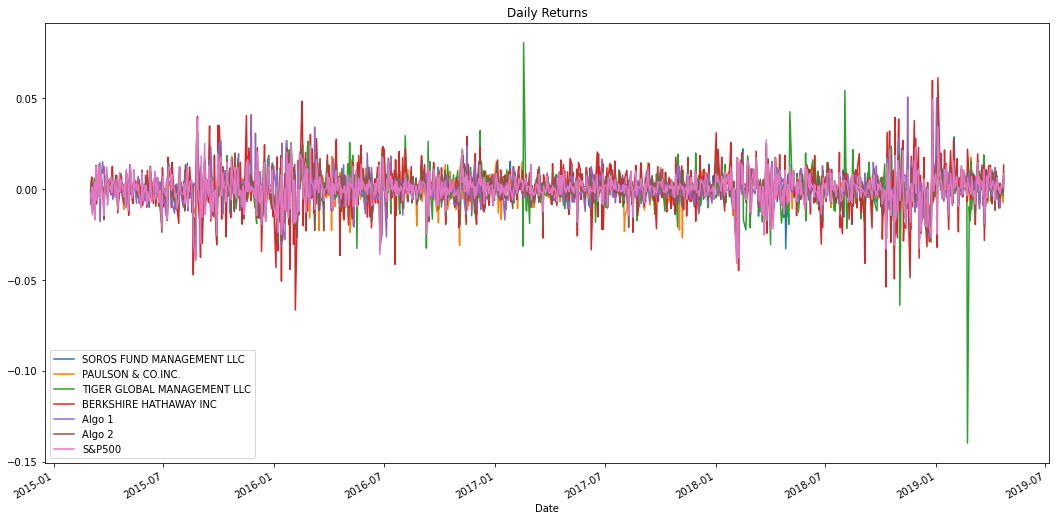

In [82]:
# Plot daily returns
joined_df.plot(figsize=(18,9), title = 'Daily Returns' )

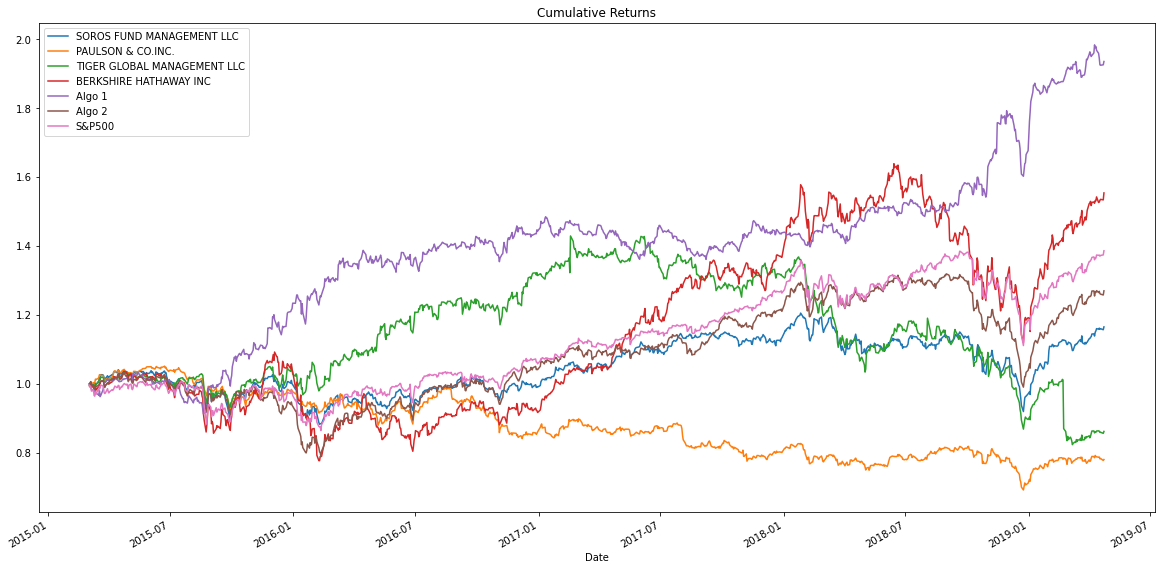

In [83]:
# Plot cumulative returns
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.plot(figsize= (20,10), title = 'Cumulative Returns')




---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

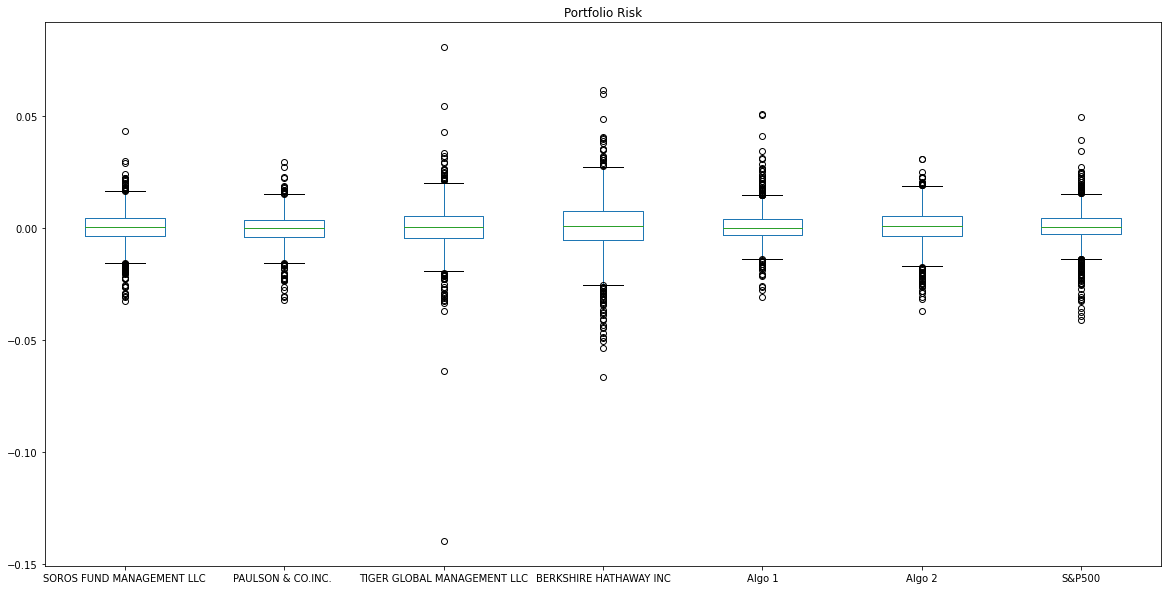

In [84]:
# Box plot to visually show risk
joined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [85]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
joined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [86]:
# Determine which portfolios are riskier than the S&P 500
sp500 = joined_df['S&P500'].std()
joined_df.std() < sp500

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                          True
S&P500                         False
dtype: bool

In [87]:
# Calculate the annualized standard deviation (252 trading days)
joined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

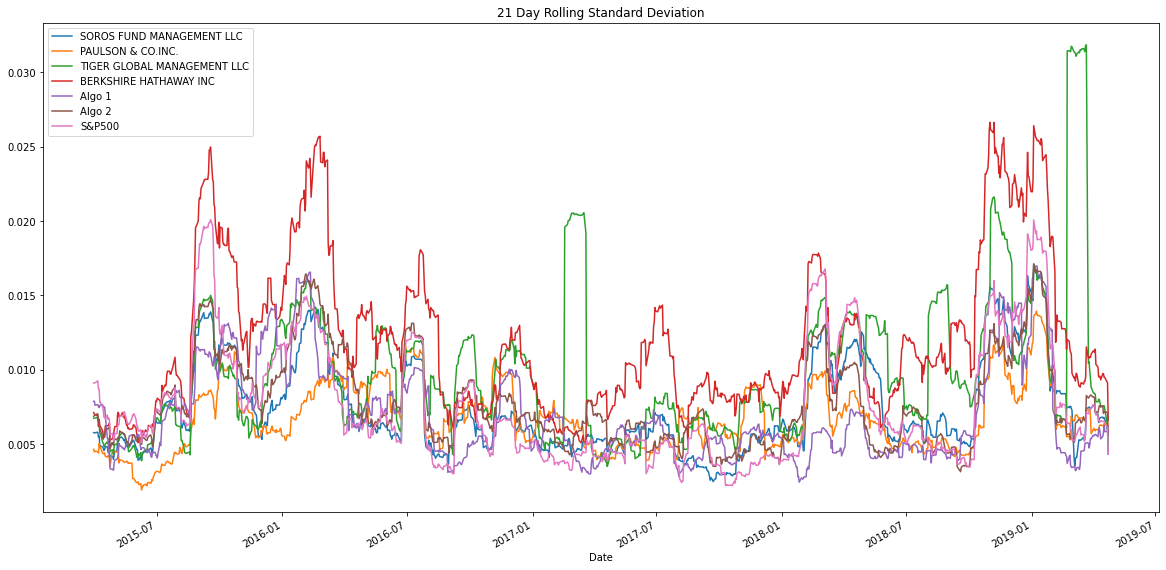

In [88]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
joined_df.rolling(window=21).std().plot(figsize=(20,10),title="21 Day Rolling Standard Deviation")

In [89]:
# Correlation
correlation = joined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


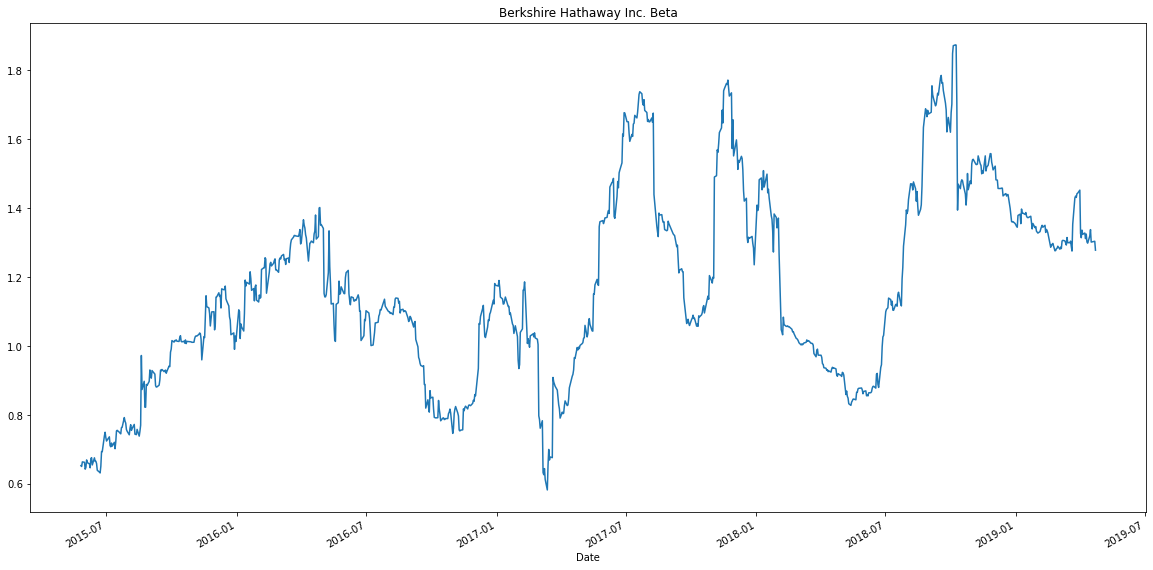

In [92]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = joined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joined_df["S&P500"])
variance = joined_df["S&P500"].rolling(60).var()
(covariance / variance).plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

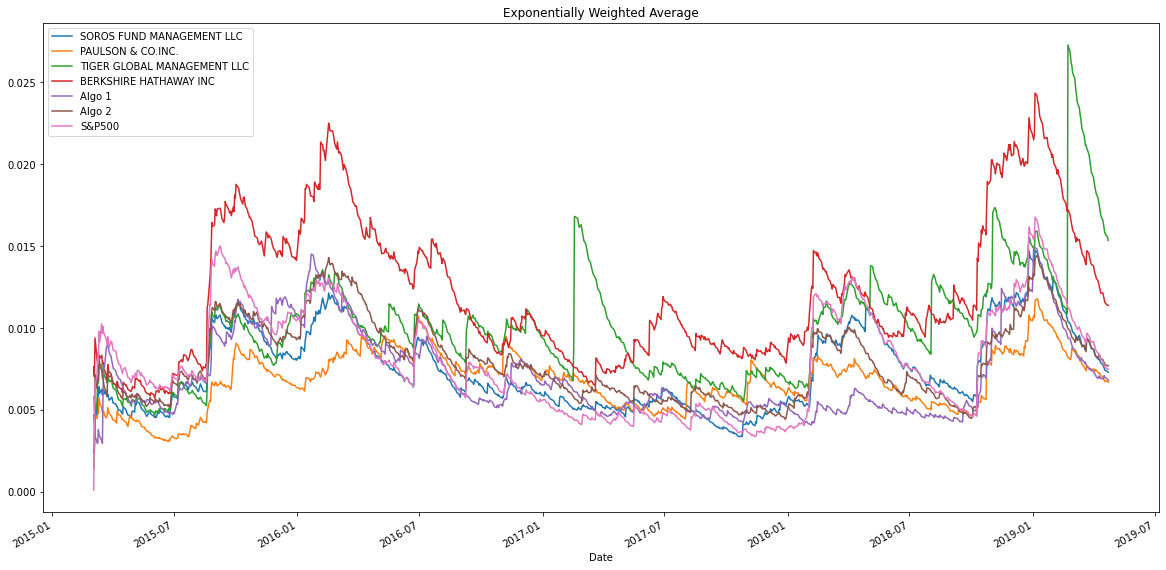

In [93]:
joined_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [38]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std()  * np.sqrt(252))


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

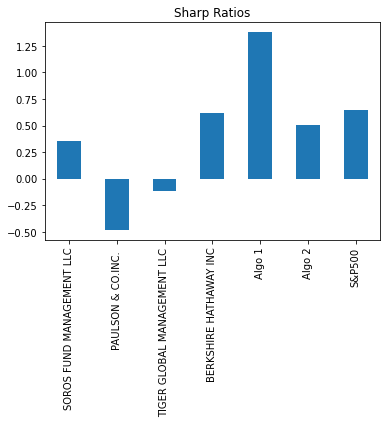

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= 'bar', title= 'Sharp Ratios')


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Read the first stock
tgt_csv = Path("Resources/TGT.csv")
tgt_df = pd.read_csv(tgt_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tgt_df = tgt_df.sort_index()
tgt_df.head()


,Close
Date,
2017-01-03,72.75
2017-01-04,73.81
2017-01-05,72.56
2017-01-06,71.44
2017-01-09,71.43


In [41]:
# Read the second stock
tjxcsv = Path('Resources/TJX.csv')
tjx_df = pd.read_csv(tjxcsv, index_col='Date', infer_datetime_format=True,parse_dates=True)
tjx_df = tjx_df.sort_index()
tjx_df.head()

,Close
Date,
2017-01-03,37.73
2017-01-04,38.31
2017-01-05,38.08
2017-01-06,37.99
2017-01-09,38.05


In [42]:
# Read the third stock
wmtcsv = Path('Resources/WMT.csv')
wmt_df = pd.read_csv(wmtcsv, index_col= 'Date', infer_datetime_format=True,parse_dates=True)
wmt_df = wmt_df.sort_index()
wmt_df.head()


,Close
Date,
2017-01-03,68.66
2017-01-04,69.06
2017-01-05,69.21
2017-01-06,68.26
2017-01-09,68.71


In [43]:
# Concatenate all stocks into a single DataFrame
all_df = pd.concat([tgt_df,tjx_df,wmt_df], axis='columns', join='inner')
all_df
column = ['TGT','TJX','WMT']
all_df.columns= column
all_df.head()


,TGT,TJX,WMT
Date,,,
2017-01-03,72.75,37.73,68.66
2017-01-04,73.81,38.31,69.06
2017-01-05,72.56,38.08,69.21
2017-01-06,71.44,37.99,68.26
2017-01-09,71.43,38.05,68.71


In [44]:
# Reset the index
#all_df = all_df.reset_index()
#all_df.head()


In [45]:
# Drop Nulls
all_df.dropna()


,TGT,TJX,WMT
Date,,,
2017-01-03,72.75,37.73,68.66
2017-01-04,73.81,38.31,69.06
2017-01-05,72.56,38.08,69.21
2017-01-06,71.44,37.99,68.26
2017-01-09,71.43,38.05,68.71
...,...,...,...
2019-12-24,128.55,60.38,119.51
2019-12-26,128.89,60.82,119.52
2019-12-27,129.21,60.85,119.59


In [46]:
daily_returns = all_df.pct_change().dropna()
daily_returns.head()



,TGT,TJX,WMT
Date,,,
2017-01-04,0.014570,0.015372,0.005826
2017-01-05,-0.016935,-0.006004,0.002172
2017-01-06,-0.015436,-0.002363,-0.013726
2017-01-09,-0.000140,0.001579,0.006592
2017-01-10,0.000000,0.007884,-0.006986


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()


Date
2017-01-04    0.011923
2017-01-05   -0.006922
2017-01-06   -0.010508
2017-01-09    0.002677
2017-01-10    0.000299
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
new_portfolio = pd.concat([joined_df,daily_returns], axis=1, join='inner')
new_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,TGT,TJX,WMT
Date,,,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000122,0.004609,0.004881
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.008662,0.010461,0.002235
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.007015,0.001090,0.000194
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.014893,-0.012881,-0.007850
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.001707,0.014336,0.006838


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio.dropna(inplace = True)
new_portfolio.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
TGT                            0
TJX                            0
WMT                            0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [51]:
# Risk
new_portfolio.std() * np.sqrt(252)


SOROS FUND MANAGEMENT LLC      0.124795
PAULSON & CO.INC.              0.107732
TIGER GLOBAL MANAGEMENT LLC    0.188647
BERKSHIRE HATHAWAY INC         0.198369
Algo 1                         0.106695
Algo 2                         0.120169
S&P500                         0.129174
TGT                            0.284352
TJX                            0.194469
WMT                            0.204756
dtype: float64

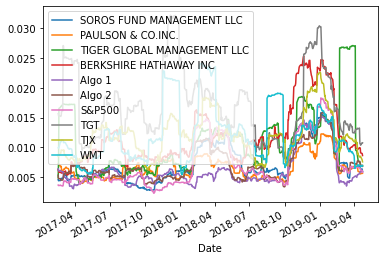

In [52]:
# Rolling
new_portfolio.rolling(window=30).std().plot()


In [53]:
# Beta
covariance = new_portfolio["WMT"].cov(new_portfolio["S&P500"])
variance = new_portfolio["WMT"].var()
beta = (covariance / variance)
beta




0.24949466660982603

In [54]:
# Annualzied Sharpe Ratios
sharpe_ratios = (new_portfolio.mean() * 252) / (new_portfolio.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.614773
PAULSON & CO.INC.             -0.404520
TIGER GLOBAL MANAGEMENT LLC   -0.888148
BERKSHIRE HATHAWAY INC         1.242706
Algo 1                         1.223376
Algo 2                         0.747427
S&P500                         0.948652
TGT                            0.330343
TJX                            0.949749
WMT                            0.967028
dtype: float64

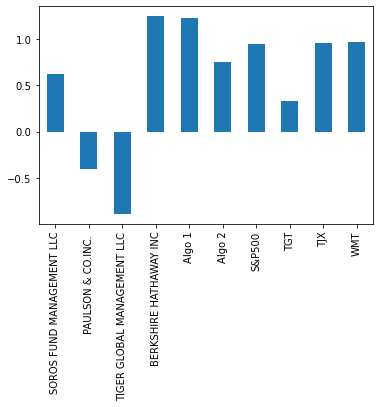

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")


## Include correlation analysis to determine which stocks (if any) are correlated

In [56]:
df = new_portfolio.corr()


In [57]:
df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,TGT,TJX,WMT
SOROS FUND MANAGEMENT LLC,1.000000,0.686080,0.485794,0.761123,0.279254,0.797112,0.811876,0.316758,0.372561,0.331201
PAULSON & CO.INC.,0.686080,1.000000,0.419360,0.565238,0.285009,0.718771,0.694322,0.283652,0.337035,0.249631
TIGER GLOBAL MANAGEMENT LLC,0.485794,0.419360,1.000000,0.344809,0.090185,0.430232,0.525047,0.230080,0.252559,0.353713
BERKSHIRE HATHAWAY INC,0.761123,0.565238,0.344809,1.000000,0.240730,0.737636,0.798178,0.230828,0.332638,0.216274
Algo 1,0.279254,0.285009,0.090185,0.240730,1.000000,0.296016,0.248901,0.051001,0.111100,0.058340
